# Variance and EOF plots like in Leroux et al 2018

* Using AMOC files from https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/catalog/meomopendap/extract/lerouste/AMOC/catalog.html



## Import modules

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

import scipy.io

from eofs.xarray import Eof
from eofs.examples import example_data_path

%matplotlib inline 

## READ DATA files (detrended AMOC Annual and Monthly)

In [38]:
### local (my laptop)
diri = "/Users/leroux/DATA/OCCIPUT_DATA/AMOC/"

# AMOC  ANNUAL detrended (like in Leroux et al paper 2018)
filiA = "AMOCSIG.ORCA025.L75-OCCITENS.1960-2015.A_dt.nc"  

# AMOC MONTHLY detrended 
filidc = "AMOCSIG.ORCA025.L75-OCCITENS.1960-2015_corrected_dtdc.nc" 


# READ
amocA = xr.open_dataset(diri+filiA)['amoc_dt']
amocA

# READ
amocdc = xr.open_dataset(diri+filidc)['amoc_dtdc']
amocdc



# output parameters (plots)
dpifig=300 #(fig resolution)
diro = "/Users/leroux/Desktop/plots/"

## Prior to computing the EOFS, select data like in Leroux et al paper, i.e. 1979-2015 , from 35S to 70N

In [39]:
latstarteof=-35.
latstopeof=70.

amocA_select = amocA.sel(time_counter=slice('1979-01-01','2015-12-31'),nav_lat=slice(latstarteof,latstopeof))

amocDC_select = amocdc.sel(time_counter=slice('1979-01-01','2015-12-31'),nav_lat=slice(latstarteof,latstopeof))

---
---
---
---

# Plot timeseries at Rapid array (lat: 26.5N): from ANNUAL timeseries

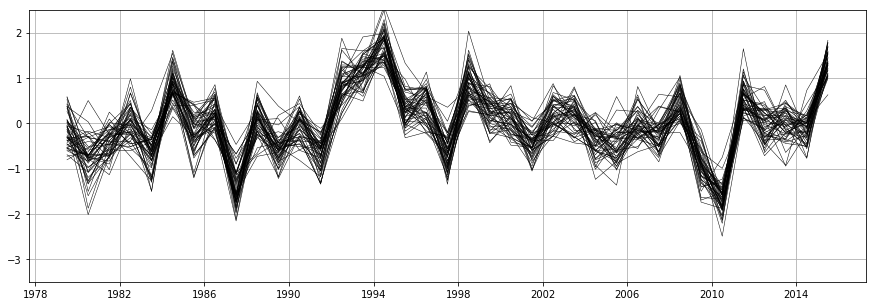

In [4]:
data2plot = amocA_select

# latitude at which to plot
jl=26.5

# output plot name
plto = 'amocAdt_lat_'+str(jl)

fig2 = plt.figure(figsize=([15,5]),facecolor='white')  
for im in range(0,50):
    plt.plot(data2plot.time_counter,data2plot.sel(e=im,nav_lat=jl,method='nearest'),color='k',linewidth=0.5)
    
plt.ylim(-3.5,2.5)

ax = plt.gca()
ax.grid(True, which='both') 

plt.show()

# Save fig in png, resolution dpi
fig2.savefig(diro+"/"+plto+'.png', facecolor=fig2.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig2)   


# Time-Mean Ensemble Variance plot: (from ANNUAL timeseries)

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


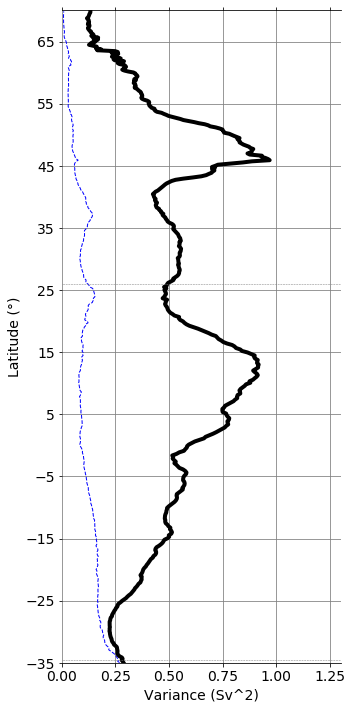

In [5]:
TM_ESTD   = amocA_select.var(dim='e').mean(dim='time_counter')
TM_EMEAN  = amocA_select.mean(dim='e').var(dim='time_counter')

    
plt.close('all')  
fig1 = plt.figure(figsize=([5,12]),facecolor='white')  #A9D0F5


plt.plot(TM_ESTD,TM_ESTD.nav_lat,color="b",linewidth=1,linestyle="--")

plt.plot(TM_EMEAN,TM_EMEAN.nav_lat,color="k",linewidth=4.,linestyle="-")
plt.plot([-100.,100.],[26.,26.],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100.,100.],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.ylim( -35, 70 )
plt.xlim( 0, 1.3 )
ax = plt.gca()    

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_xaxis().tick_top() 
ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left() 
ax.get_yaxis().tick_right()
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

plt.ylabel(u"Latitude (\u00B0)")

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
        labelbottom="on", left="on", right="off", labelright="off",labelleft="on")  


plt.xlabel('Variance (Sv^2)')

    

plt.show()   
fig1.savefig(diro+"testvarA.png", facecolor=fig1.get_facecolor(), edgecolor='none')


---
---
---
---

# Plot timeseries at Rapid array (lat: 26.5N): from MONTHLY timeseries

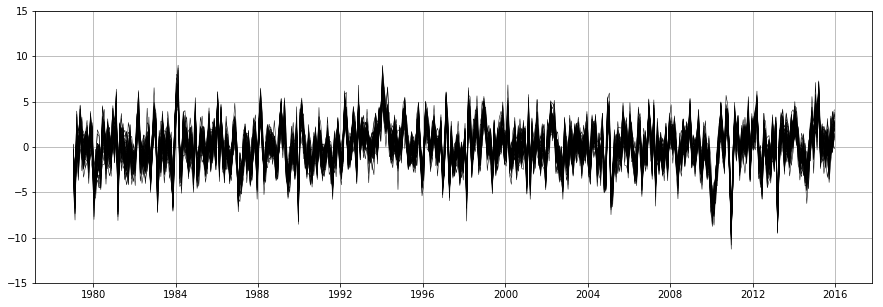

In [40]:
data2plot = amocDC_select

# latitude at which to plot
jl=26.5

# output plot name
plto = 'amocMdtdc_lat_'+str(jl)

fig2 = plt.figure(figsize=([15,5]),facecolor='white')  
for im in range(0,50):
    plt.plot(data2plot.time_counter,data2plot.sel(e=im,nav_lat=jl,method='nearest'),color='k',linewidth=0.5)
    
plt.ylim(-15,15)

ax = plt.gca()
ax.grid(True, which='both') 

plt.show()

# Save fig in png, resolution dpi
fig2.savefig(diro+"/"+plto+'.png', facecolor=fig2.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig2)   


# Time-Mean Ensemble Variance plot: (from MONTHLY timeseries)

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


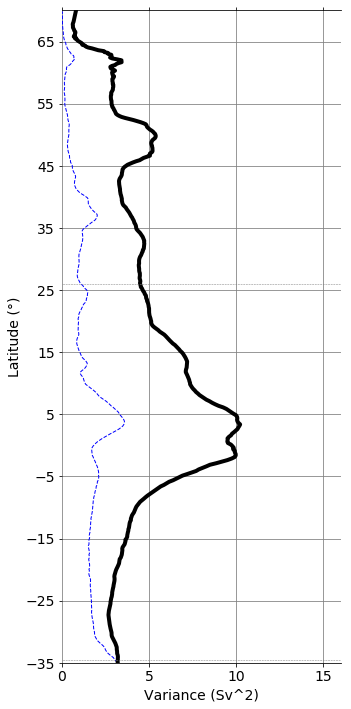

In [7]:
TM_ESTD   = amocDC_select.var(dim='e').mean(dim='time_counter')
TM_EMEAN  = amocDC_select.mean(dim='e').var(dim='time_counter') 
    
plt.close('all')  
fig1 = plt.figure(figsize=([5,12]),facecolor='white')  #A9D0F5

#plt.plot(EMEAN_VARMB,ptslats,color="k",linewidth=0.5,linestyle=":")
plt.plot(TM_ESTD,TM_ESTD.nav_lat,color="b",linewidth=1,linestyle="--")

plt.plot(TM_EMEAN,TM_EMEAN.nav_lat,color="k",linewidth=4.,linestyle="-")
plt.plot([-100.,100.],[26.,26.],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100.,100.],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.ylim( -35, 70 )
plt.xlim( 0, 16 )
ax = plt.gca()    

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_xaxis().tick_top() 
ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left() 
ax.get_yaxis().tick_right()
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

plt.ylabel(u"Latitude (\u00B0)")

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
        labelbottom="on", left="on", right="off", labelright="off",labelleft="on")  

plt.xlabel('Variance (Sv^2)')
    

plt.show()   
fig1.savefig(diro+"testvarM.png", facecolor=fig1.get_facecolor(), edgecolor='none')


---
---
---
---

# EOF plot from ANNUAL timeseries (like in Leroux et al 2018)

* Compute Intrinsic and Emean components of AMOC timeseries

In [8]:
EMEAN = amocA_select.mean(dim='e')
INTR = amocA_select - EMEAN

* Stack dimensions time and ensemble before computing the EOFs

In [9]:
comballmb = INTR.stack(time=('time_counter','e')).transpose()

* Compute EOFs for the intrinsic component (ANNUAL AMOC)

In [10]:
solverintrinsic = Eof(comballmb,center=True)
# center=True: remove the time mean (but anyway, recall that the data have also already been filtered and centered in previous processing).


# Retrieve the leading EOF, expressed as the covariance between the leading PC timeseries and the input data at each gridpoint.
eofsintr = solverintrinsic.eofsAsCovariance(neofs=10,pcscaling=1)

# Retrieve % of the covariance matrix explained by EOFs. Will be use for plot labels.
expvarintr = solverintrinsic.varianceFraction(neigs=10)

# As an option: reverse sign of eofs to match with a prefered pattern
coeffintrall = np.ones_like(eofsintr[0,:])*1.0
coeffintrall[0]=-1
coeffintrall[1]=1. #-1
coeffintrall[2]=1.
eofsintr[0,:] = coeffintrall[0]*eofsintr[0,:]
eofsintr[1,:] = coeffintrall[1]*eofsintr[1,:]
eofsintr[2,:] = coeffintrall[2]*eofsintr[2,:]


# Retrive PC timeseries
pcsintr = solverintrinsic.pcs(pcscaling=1)

# Reverse PC sign if needed,  according to choices above
pcsintr[:,0] = coeffintrall[0]*pcsintr[:,0]
pcsintr[:,1] = coeffintrall[1]*pcsintr[:,1]
pcsintr[:,2] = coeffintrall[2]*pcsintr[:,2]

# Retrieve  Total variance associated with the field of anomalies (the sum of the eigenvalues)
totvarintr = solverintrinsic.totalAnomalyVariance()



* Prepare variables to write in netcdf output file (write out only the 2 first modes)

In [11]:

eig                = solverintrinsic.eigenvalues(neigs=2) 

fracvar            = solverintrinsic.varianceFraction(neigs=2) 

pcsintr_2save      = pcsintr.unstack(dim='time')
pcintr_2s_select     = pcsintr_2save[0:2,:,:] 

eofsintr_2save       = eofsintr[0:2,:]

* WRITE OUTPUT IN NETCDF

In [12]:
outfi = diri+'EOFs-INTR.AMOCSIG.ORCA025.L75-OCCITENS.1960-2015_Adt.nc'

pcintr_2s_select.name = 'pc'
pcintr_2s_select.attrs['long_name'] =  "Principal_component_time_series"
pcintr_2s_select.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
pcintr_2s_select.to_netcdf(outfi,mode='w')

eig.name = 'eig'
eig.attrs['long_name'] =  "Eigen values"
eig.to_netcdf(outfi,mode='a')

fracvar.name = 'fracvar'
fracvar.attrs['long_name'] =  "variance_fractions"
fracvar.to_netcdf(outfi,mode='a')

eofsintr_2save.name = 'eof'
eofsintr_2save.attrs['long_name'] =  "Covariance_between_pcs_and_amoc_timeseries"
eofsintr_2save.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
eofsintr_2save.to_netcdf(outfi,mode='a')


* Read from output file (as a final test) and plot EOFs 

In [13]:
readtest_fracvar = xr.open_dataset(outfi)['fracvar']
print(readtest_fracvar.values)

readtest_eig = xr.open_dataset(outfi)['eig']
print(readtest_eig.values)


readtest_pcs = xr.open_dataset(outfi)['pc']
print(readtest_pcs)

readtest_eofs = xr.open_dataset(outfi)['eof']
print(readtest_eofs)

[ 0.43887426  0.16172593]
[ 21.78587566   8.02813309]
<xarray.DataArray 'pc' (mode: 2, time_counter: 37, e: 50)>
array([[[ 0.864249, -0.073049, ...,  1.456861,  0.992274],
        [-0.730629, -0.813459, ..., -0.717876,  0.723593],
        ..., 
        [ 1.712576, -2.395844, ...,  0.154118, -1.165599],
        [-0.754304,  1.107326, ...,  0.263132,  1.727393]],

       [[ 1.951974,  0.50449 , ..., -0.265227,  0.134118],
        [-0.848185, -0.325506, ...,  0.332573, -1.756233],
        ..., 
        [ 0.027902,  0.02187 , ..., -1.232758, -1.506251],
        [ 0.215698, -0.630985, ...,  0.38065 ,  0.149922]]])
Coordinates:
  * mode          (mode) int64 0 1
  * time_counter  (time_counter) datetime64[ns] 1979-07-01T16:59:44 ...
  * e             (e) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    long_name:  Principal_component_time_series
    scaling:    Scaled to unit variance (divided by the square-root of their ...
<xarray.DataArray 'eof' (mode: 2, nav_lat:

* Plot (as a final test)

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


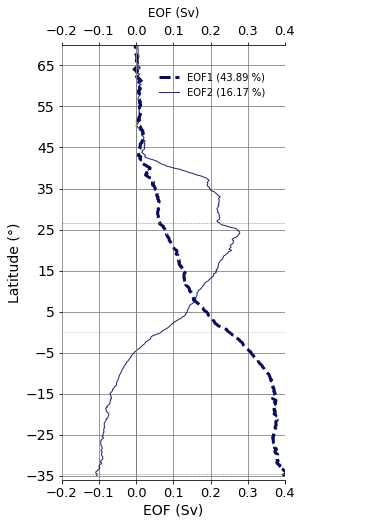

In [14]:
# EOF variance to display on plot
labeof1intr = "EOF1 ("+str(round(readtest_fracvar[0].values*100,2))+" %) "
labeof2intr = "EOF2 ("+str(round(readtest_fracvar[1].values*100,2))+" %) "


# lats
ptslats = readtest_eofs.nav_lat

#########################################################################################
#########################################################################################
# FIG 1 EOF reg patterns
#########################################################################################

plt.close('all') 
fig1 = plt.figure(figsize=([4,8]),facecolor='white')    

plt.plot(readtest_eofs[0,:],ptslats,label=labeof1intr,color="#0B0B61",linewidth=3,linestyle="--")
plt.plot(readtest_eofs[1,:],ptslats,label=labeof2intr,color='#0B0B61',linewidth=1,linestyle="-",alpha=0.9)

plt.ylim( -36, 70 )

# Plot customization
ax = plt.gca()    

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
            labelbottom="on",labeltop="on", left="off", right="off", labelright="off",labelleft="on")  

plt.legend(bbox_to_anchor=(0.42, 0.87, 1., -0.5), loc=3,
           ncol=1, mode="expand", borderaxespad=0.,frameon=False)          

plt.plot([0.,0.],[-90.,90.],color="grey",linewidth=1)

plt.plot([-100,100],[26.6,26.6],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[0,0],color="grey",linewidth=0.5,linestyle=':')


# Remove the plot frame lines.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_yaxis().tick_left() 
ax.yaxis.grid(color="grey") # horizontal lines
ax.xaxis.grid(color="grey")
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlim( -0.2, 0.4 )   # monthrly 2yr-filt
ax.set_xticks(np.arange(-0.2,0.4,0.1))

plt.ylabel(u"Latitude (\u00B0)")
plt.xlabel('EOF (Sv)')
plt.title('EOF (Sv)',y=1.05)


plt.show()
fig1.savefig(diro+"EOF.occisigA.lat"+str(latstarteof)+"-"+str(latstopeof)+".INTRpatternREG.png", facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# NOW WITH MONTHLY DATA:

* Compute Intrinsic and Emean components of AMOC timeseries

In [15]:
EMEAN = amocDC_select.mean(dim='e')
INTR = amocDC_select - EMEAN

* Stack dimensions time and ensemble before computing the EOFs

In [16]:
comballmb = INTR.stack(time=('time_counter','e')).transpose()

* Compute EOFs for the intrinsic component (ANNUAL AMOC)

In [17]:
solverintrinsic = Eof(comballmb,center=True)
# center=True: remove the time mean (but anyway, recall that the data have also already been filtered and centered in previous processing).


# Retrieve the leading EOF, expressed as the covariance between the leading PC timeseries and the input data at each gridpoint.
eofsintr = solverintrinsic.eofsAsCovariance(neofs=10,pcscaling=1)

# Retrieve % of the covariance matrix explained by EOFs. Will be use for plot labels.
expvarintr = solverintrinsic.varianceFraction(neigs=10)

# As an option: reverse sign of eofs to match with a prefered pattern
coeffintrall = np.ones_like(eofsintr[0,:])*1.0
coeffintrall[0]=1
coeffintrall[1]=1. #-1
coeffintrall[2]=1.
eofsintr[0,:] = coeffintrall[0]*eofsintr[0,:]
eofsintr[1,:] = coeffintrall[1]*eofsintr[1,:]
eofsintr[2,:] = coeffintrall[2]*eofsintr[2,:]


# Retrive PC timeseries
pcsintr = solverintrinsic.pcs(pcscaling=1)

# Reverse PC sign if needed,  according to choices above
pcsintr[:,0] = coeffintrall[0]*pcsintr[:,0]
pcsintr[:,1] = coeffintrall[1]*pcsintr[:,1]
pcsintr[:,2] = coeffintrall[2]*pcsintr[:,2]

# Retrieve  Total variance associated with the field of anomalies (the sum of the eigenvalues)
totvarintr = solverintrinsic.totalAnomalyVariance()



* Prepare variables to write in netcdf output file (write out only the 2 first modes)

In [18]:

eig                = solverintrinsic.eigenvalues(neigs=2) 

fracvar            = solverintrinsic.varianceFraction(neigs=2) 

pcsintr_2save      = pcsintr.unstack(dim='time')
pcintr_2s_select     = pcsintr_2save[0:2,:,:] 

eofsintr_2save       = eofsintr[0:2,:]

* WRITE OUTPUT IN NETCDF

In [19]:
outfi = diri+'EOFs-INTR.AMOCSIG.ORCA025.L75-OCCITENS.1960-2015_Mdtdc.nc'

pcintr_2s_select.name = 'pc'
pcintr_2s_select.attrs['long_name'] =  "Principal_component_time_series"
pcintr_2s_select.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
pcintr_2s_select.to_netcdf(outfi,mode='w')

eig.name = 'eig'
eig.attrs['long_name'] =  "Eigen values"
eig.to_netcdf(outfi,mode='a')

fracvar.name = 'fracvar'
fracvar.attrs['long_name'] =  "variance_fractions"
fracvar.to_netcdf(outfi,mode='a')

eofsintr_2save.name = 'eof'
eofsintr_2save.attrs['long_name'] =  "Covariance_between_pcs_and_amoc_timeseries"
eofsintr_2save.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
eofsintr_2save.to_netcdf(outfi,mode='a')


* Read from output file (as a final test) and plot EOFs 

In [20]:
readtest_fracvar = xr.open_dataset(outfi)['fracvar']
print(readtest_fracvar.values)

readtest_eig = xr.open_dataset(outfi)['eig']
print(readtest_eig.values)


readtest_pcs = xr.open_dataset(outfi)['pc']
print(readtest_pcs)

readtest_eofs = xr.open_dataset(outfi)['eof']
print(readtest_eofs)

[ 0.34523546  0.18570066]
[ 212.23176917  114.15854789]
<xarray.DataArray 'pc' (mode: 2, time_counter: 444, e: 50)>
array([[[-2.207634, -0.129251, ..., -0.66588 ,  1.176405],
        [ 1.17798 ,  0.388394, ...,  1.54349 ,  0.797385],
        ..., 
        [-0.164433, -1.554005, ...,  1.583775,  1.097693],
        [ 0.025774, -0.068931, ..., -0.193752,  1.105506]],

       [[ 1.590317,  0.708901, ..., -0.675637,  2.806981],
        [ 0.733117,  0.057952, ..., -0.132909, -0.244862],
        ..., 
        [-0.650528,  0.025008, ...,  0.490974, -1.511265],
        [ 0.796167,  0.501659, ..., -0.284247, -0.851551]]])
Coordinates:
  * mode          (mode) int64 0 1
  * time_counter  (time_counter) datetime64[ns] 1979-01-16T12:00:00 ...
  * e             (e) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    long_name:  Principal_component_time_series
    scaling:    Scaled to unit variance (divided by the square-root of their ...
<xarray.DataArray 'eof' (mode: 2, nav_l

* Plot (as a final test)

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


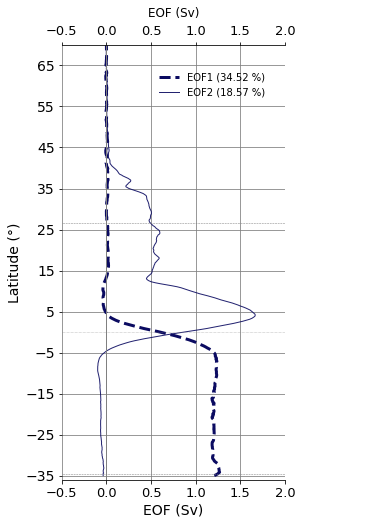

In [21]:
# EOF variance to display on plot
labeof1intr = "EOF1 ("+str(round(readtest_fracvar[0].values*100,2))+" %) "
labeof2intr = "EOF2 ("+str(round(readtest_fracvar[1].values*100,2))+" %) "


# lats
ptslats = readtest_eofs.nav_lat

#########################################################################################
#########################################################################################
# FIG 1 EOF reg patterns
#########################################################################################

plt.close('all') 
fig1 = plt.figure(figsize=([4,8]),facecolor='white')    

plt.plot(readtest_eofs[0,:],ptslats,label=labeof1intr,color="#0B0B61",linewidth=3,linestyle="--")
plt.plot(readtest_eofs[1,:],ptslats,label=labeof2intr,color='#0B0B61',linewidth=1,linestyle="-",alpha=0.9)

plt.ylim( -36, 70 )

# Plot customization
ax = plt.gca()    

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
            labelbottom="on",labeltop="on", left="off", right="off", labelright="off",labelleft="on")  

plt.legend(bbox_to_anchor=(0.42, 0.87, 1., -0.5), loc=3,
           ncol=1, mode="expand", borderaxespad=0.,frameon=False)          

plt.plot([0.,0.],[-90.,90.],color="grey",linewidth=1)

plt.plot([-100,100],[26.6,26.6],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[0,0],color="grey",linewidth=0.5,linestyle=':')


# Remove the plot frame lines.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_yaxis().tick_left() 
ax.yaxis.grid(color="grey") # horizontal lines
ax.xaxis.grid(color="grey")
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlim( -0.5, 2 )   # monthrly 2yr-filt
#ax.set_xticks(np.arange(-0.2,0.4,0.1))

plt.ylabel(u"Latitude (\u00B0)")
plt.xlabel('EOF (Sv)')
plt.title('EOF (Sv)',y=1.05)


plt.show()
fig1.savefig(diro+"EOF.occisigMdc.lat"+str(latstarteof)+"-"+str(latstopeof)+".INTRpatternREG.png", facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# EOFs from MONTHLY AMOC (north of 10N)

In [22]:
latstarteof=10.
latstopeof=70.
amocDC_select_NORTH = amocdc.sel(time_counter=slice('1979-01-01','2015-12-31'),nav_lat=slice(latstarteof,latstopeof))

In [23]:
EMEAN = amocDC_select_NORTH.mean(dim='e')
INTR  = amocDC_select_NORTH - EMEAN

* Stack dimensions time and ensemble before computing the EOFs

In [24]:
comballmb = INTR.stack(time=('time_counter','e')).transpose()

* Compute EOFs for the intrinsic component (ANNUAL AMOC)

In [25]:
solverintrinsic = Eof(comballmb,center=True)
# center=True: remove the time mean (but anyway, recall that the data have also already been filtered and centered in previous processing).


# Retrieve the leading EOF, expressed as the covariance between the leading PC timeseries and the input data at each gridpoint.
eofsintr = solverintrinsic.eofsAsCovariance(neofs=10,pcscaling=1)

# Retrieve % of the covariance matrix explained by EOFs. Will be use for plot labels.
expvarintr = solverintrinsic.varianceFraction(neigs=10)

# As an option: reverse sign of eofs to match with a prefered pattern
coeffintrall = np.ones_like(eofsintr[0,:])*1.0
coeffintrall[0]=-1
coeffintrall[1]=1. #-1
coeffintrall[2]=1.
eofsintr[0,:] = coeffintrall[0]*eofsintr[0,:]
eofsintr[1,:] = coeffintrall[1]*eofsintr[1,:]
eofsintr[2,:] = coeffintrall[2]*eofsintr[2,:]


# Retrive PC timeseries
pcsintr = solverintrinsic.pcs(pcscaling=1)

# Reverse PC sign if needed,  according to choices above
pcsintr[:,0] = coeffintrall[0]*pcsintr[:,0]
pcsintr[:,1] = coeffintrall[1]*pcsintr[:,1]
pcsintr[:,2] = coeffintrall[2]*pcsintr[:,2]

# Retrieve  Total variance associated with the field of anomalies (the sum of the eigenvalues)
totvarintr = solverintrinsic.totalAnomalyVariance()



* Prepare variables to write in netcdf output file (write out only the 2 first modes)

In [26]:

eig                = solverintrinsic.eigenvalues(neigs=2) 

fracvar            = solverintrinsic.varianceFraction(neigs=2) 

pcsintr_2save      = pcsintr.unstack(dim='time')
pcintr_2s_select     = pcsintr_2save[0:2,:,:] 

eofsintr_2save       = eofsintr[0:2,:]

* WRITE OUTPUT IN NETCDF

In [27]:
outfi = diri+'EOFs-INTR.AMOCSIG.ORCA025.L75-OCCITENS.1960-2015_Mdtdc_north.nc'

pcintr_2s_select.name = 'pc'
pcintr_2s_select.attrs['long_name'] =  "Principal_component_time_series"
pcintr_2s_select.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
pcintr_2s_select.to_netcdf(outfi,mode='w')

eig.name = 'eig'
eig.attrs['long_name'] =  "Eigen values"
eig.to_netcdf(outfi,mode='a')

fracvar.name = 'fracvar'
fracvar.attrs['long_name'] =  "variance_fractions"
fracvar.to_netcdf(outfi,mode='a')

eofsintr_2save.name = 'eof'
eofsintr_2save.attrs['long_name'] =  "Covariance_between_pcs_and_amoc_timeseries"
eofsintr_2save.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
eofsintr_2save.to_netcdf(outfi,mode='a')


* Read from output file (as a final test) and plot EOFs 

In [28]:
readtest_fracvar = xr.open_dataset(outfi)['fracvar']
print(readtest_fracvar.values)

readtest_eig = xr.open_dataset(outfi)['eig']
print(readtest_eig.values)


readtest_pcs = xr.open_dataset(outfi)['pc']
print(readtest_pcs)

readtest_eofs = xr.open_dataset(outfi)['eof']
print(readtest_eofs)

[ 0.29593184  0.078614  ]
[ 67.85973451  18.02687126]
<xarray.DataArray 'pc' (mode: 2, time_counter: 444, e: 50)>
array([[[ 2.042723,  0.70206 , ..., -0.454218,  2.412747],
        [ 0.256906,  1.103124, ..., -0.318431, -1.510074],
        ..., 
        [ 0.4426  ,  1.734211, ..., -0.124592, -0.661741],
        [ 1.244521, -0.094304, ..., -0.274907, -0.379844]],

       [[-2.650033, -0.15158 , ...,  1.197393, -0.458566],
        [ 0.202228,  0.85769 , ..., -0.973687,  1.881487],
        ..., 
        [ 2.417031,  0.647415, ...,  0.312011, -0.202163],
        [-0.428808,  0.151274, ...,  1.16495 , -0.978101]]])
Coordinates:
  * mode          (mode) int64 0 1
  * time_counter  (time_counter) datetime64[ns] 1979-01-16T12:00:00 ...
  * e             (e) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    long_name:  Principal_component_time_series
    scaling:    Scaled to unit variance (divided by the square-root of their ...
<xarray.DataArray 'eof' (mode: 2, nav_lat

* Plot (as a final test)

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


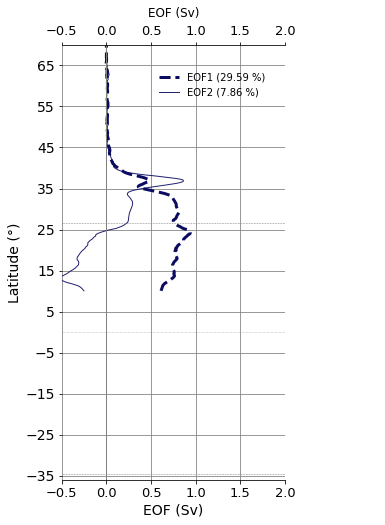

In [29]:
# EOF variance to display on plot
labeof1intr = "EOF1 ("+str(round(readtest_fracvar[0].values*100,2))+" %) "
labeof2intr = "EOF2 ("+str(round(readtest_fracvar[1].values*100,2))+" %) "


# lats
ptslats = readtest_eofs.nav_lat

#########################################################################################
#########################################################################################
# FIG 1 EOF reg patterns
#########################################################################################

plt.close('all') 
fig1 = plt.figure(figsize=([4,8]),facecolor='white')    

plt.plot(readtest_eofs[0,:],ptslats,label=labeof1intr,color="#0B0B61",linewidth=3,linestyle="--")
plt.plot(readtest_eofs[1,:],ptslats,label=labeof2intr,color='#0B0B61',linewidth=1,linestyle="-",alpha=0.9)

plt.ylim( -36, 70 )

# Plot customization
ax = plt.gca()    

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
            labelbottom="on",labeltop="on", left="off", right="off", labelright="off",labelleft="on")  

plt.legend(bbox_to_anchor=(0.42, 0.87, 1., -0.5), loc=3,
           ncol=1, mode="expand", borderaxespad=0.,frameon=False)          

plt.plot([0.,0.],[-90.,90.],color="grey",linewidth=1)

plt.plot([-100,100],[26.6,26.6],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[0,0],color="grey",linewidth=0.5,linestyle=':')


# Remove the plot frame lines.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_yaxis().tick_left() 
ax.yaxis.grid(color="grey") # horizontal lines
ax.xaxis.grid(color="grey")
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlim( -0.5, 2 )   # monthrly 2yr-filt
#ax.set_xticks(np.arange(-0.2,0.4,0.1))

plt.ylabel(u"Latitude (\u00B0)")
plt.xlabel('EOF (Sv)')
plt.title('EOF (Sv)',y=1.05)


plt.show()
fig1.savefig(diro+"EOF.occisigMdc.lat"+str(latstarteof)+"-"+str(latstopeof)+".INTRpatternREG.png", facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# EOFs from MONTHLY AMOC (south of 10N)

In [30]:
latstarteof=-35.
latstopeof=10.
amocDC_select_SOUTH = amocdc.sel(time_counter=slice('1979-01-01','2015-12-31'),nav_lat=slice(latstarteof,latstopeof))

In [31]:
EMEAN = amocDC_select_SOUTH.mean(dim='e')
INTR  = amocDC_select_SOUTH - EMEAN

* Stack dimensions time and ensemble before computing the EOFs

In [32]:
comballmb = INTR.stack(time=('time_counter','e')).transpose()

* Compute EOFs for the intrinsic component (ANNUAL AMOC)

In [33]:
solverintrinsic = Eof(comballmb,center=True)
# center=True: remove the time mean (but anyway, recall that the data have also already been filtered and centered in previous processing).


# Retrieve the leading EOF, expressed as the covariance between the leading PC timeseries and the input data at each gridpoint.
eofsintr = solverintrinsic.eofsAsCovariance(neofs=10,pcscaling=1)

# Retrieve % of the covariance matrix explained by EOFs. Will be use for plot labels.
expvarintr = solverintrinsic.varianceFraction(neigs=10)

# As an option: reverse sign of eofs to match with a prefered pattern
coeffintrall = np.ones_like(eofsintr[0,:])*1.0
coeffintrall[0]=1
coeffintrall[1]=1. #-1
coeffintrall[2]=1.
eofsintr[0,:] = coeffintrall[0]*eofsintr[0,:]
eofsintr[1,:] = coeffintrall[1]*eofsintr[1,:]
eofsintr[2,:] = coeffintrall[2]*eofsintr[2,:]


# Retrive PC timeseries
pcsintr = solverintrinsic.pcs(pcscaling=1)

# Reverse PC sign if needed,  according to choices above
pcsintr[:,0] = coeffintrall[0]*pcsintr[:,0]
pcsintr[:,1] = coeffintrall[1]*pcsintr[:,1]
pcsintr[:,2] = coeffintrall[2]*pcsintr[:,2]

# Retrieve  Total variance associated with the field of anomalies (the sum of the eigenvalues)
totvarintr = solverintrinsic.totalAnomalyVariance()



* Prepare variables to write in netcdf output file (write out only the 2 first modes)

In [34]:

eig                = solverintrinsic.eigenvalues(neigs=2) 

fracvar            = solverintrinsic.varianceFraction(neigs=2) 

pcsintr_2save      = pcsintr.unstack(dim='time')
pcintr_2s_select     = pcsintr_2save[0:2,:,:] 

eofsintr_2save       = eofsintr[0:2,:]

* WRITE OUTPUT IN NETCDF

In [35]:
outfi = diri+'EOFs-INTR.AMOCSIG.ORCA025.L75-OCCITENS.1960-2015_Mdtdc_south.nc'

pcintr_2s_select.name = 'pc'
pcintr_2s_select.attrs['long_name'] =  "Principal_component_time_series"
pcintr_2s_select.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
pcintr_2s_select.to_netcdf(outfi,mode='w')

eig.name = 'eig'
eig.attrs['long_name'] =  "Eigen values"
eig.to_netcdf(outfi,mode='a')

fracvar.name = 'fracvar'
fracvar.attrs['long_name'] =  "variance_fractions"
fracvar.to_netcdf(outfi,mode='a')

eofsintr_2save.name = 'eof'
eofsintr_2save.attrs['long_name'] =  "Covariance_between_pcs_and_amoc_timeseries"
eofsintr_2save.attrs['scaling'] =  "Scaled to unit variance (divided by the square-root of their eigenvalue)"
eofsintr_2save.to_netcdf(outfi,mode='a')


* Read from output file (as a final test) and plot EOFs 

In [36]:
readtest_fracvar = xr.open_dataset(outfi)['fracvar']
print(readtest_fracvar.values)

readtest_eig = xr.open_dataset(outfi)['eig']
print(readtest_eig.values)


readtest_pcs = xr.open_dataset(outfi)['pc']
print(readtest_pcs)

readtest_eofs = xr.open_dataset(outfi)['eof']
print(readtest_eofs)

[ 0.55053527  0.24572946]
[ 212.19629568   94.7130623 ]
<xarray.DataArray 'pc' (mode: 2, time_counter: 444, e: 50)>
array([[[-2.212502, -0.130537, ..., -0.669792,  1.170057],
        [ 1.179567,  0.38467 , ...,  1.546333,  0.804748],
        ..., 
        [-0.169181, -1.560767, ...,  1.582104,  1.101697],
        [ 0.018614, -0.069829, ..., -0.196116,  1.110176]],

       [[ 0.9047  ,  0.51401 , ..., -0.591526,  2.342304],
        [ 0.773162, -0.491378, ..., -0.00271 ,  0.426202],
        ..., 
        [-0.998283, -0.817933, ...,  0.765124, -1.559797],
        [ 0.418658,  0.704119, ..., -0.150029, -0.922965]]])
Coordinates:
  * mode          (mode) int64 0 1
  * time_counter  (time_counter) datetime64[ns] 1979-01-16T12:00:00 ...
  * e             (e) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    long_name:  Principal_component_time_series
    scaling:    Scaled to unit variance (divided by the square-root of their ...
<xarray.DataArray 'eof' (mode: 2, nav_l

* Plot (as a final test)

/Users/leroux/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


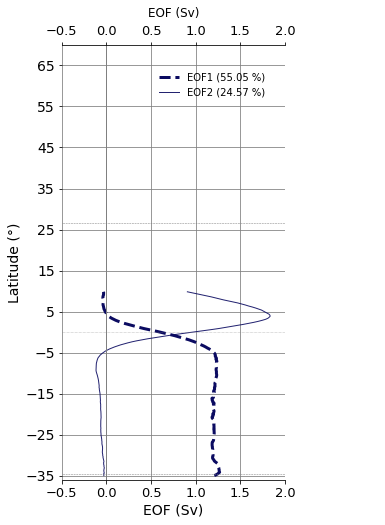

In [37]:
# EOF variance to display on plot
labeof1intr = "EOF1 ("+str(round(readtest_fracvar[0].values*100,2))+" %) "
labeof2intr = "EOF2 ("+str(round(readtest_fracvar[1].values*100,2))+" %) "


# lats
ptslats = readtest_eofs.nav_lat

#########################################################################################
#########################################################################################
# FIG 1 EOF reg patterns
#########################################################################################

plt.close('all') 
fig1 = plt.figure(figsize=([4,8]),facecolor='white')    

plt.plot(readtest_eofs[0,:],ptslats,label=labeof1intr,color="#0B0B61",linewidth=3,linestyle="--")
plt.plot(readtest_eofs[1,:],ptslats,label=labeof2intr,color='#0B0B61',linewidth=1,linestyle="-",alpha=0.9)

plt.ylim( -36, 70 )

# Plot customization
ax = plt.gca()    

ax.yaxis.set_label_position("left")
plt.tick_params(axis="both", which="both", bottom="on", top="on",  
            labelbottom="on",labeltop="on", left="off", right="off", labelright="off",labelleft="on")  

plt.legend(bbox_to_anchor=(0.42, 0.87, 1., -0.5), loc=3,
           ncol=1, mode="expand", borderaxespad=0.,frameon=False)          

plt.plot([0.,0.],[-90.,90.],color="grey",linewidth=1)

plt.plot([-100,100],[26.6,26.6],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[-34.5,-34.5],color="grey",linewidth=0.5,linestyle='--')
plt.plot([-100,100],[0,0],color="grey",linewidth=0.5,linestyle=':')


# Remove the plot frame lines.  
ax.spines["top"].set_visible(True)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

ax.get_yaxis().tick_left() 
ax.yaxis.grid(color="grey") # horizontal lines
ax.xaxis.grid(color="grey")
ax.yaxis.grid(color="grey") 
ax.xaxis.grid(color="grey")
ax.set_yticks(np.arange(-35,70,10))
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlim( -0.5, 2 )   # monthrly 2yr-filt
#ax.set_xticks(np.arange(-0.2,0.4,0.1))

plt.ylabel(u"Latitude (\u00B0)")
plt.xlabel('EOF (Sv)')
plt.title('EOF (Sv)',y=1.05)


plt.show()
fig1.savefig(diro+"EOF.occisigMdc.lat"+str(latstarteof)+"-"+str(latstopeof)+".INTRpatternREG.png", facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#